In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
uber=pd.read_csv('E:/Decodr/csv files/Uber Request Data.csv',parse_dates=True)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [2]:
#finding duplicate 'request id'
len(uber['Request id'].unique())

6745

In [3]:
uber.shape

(6745, 6)

In [4]:
#getting NA values
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
#percentage of NA values
uber.isnull().sum()/uber.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [6]:
uber['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])

In [9]:
uber['Request timestamp'].value_counts()

2016-11-07 19:02:00    6
2016-11-07 08:37:00    6
2016-11-07 09:40:00    6
2016-11-07 17:57:00    6
2016-12-07 19:17:00    5
                      ..
2016-11-07 03:29:00    1
2016-07-14 21:18:23    1
2016-07-15 07:04:55    1
2016-07-14 20:22:44    1
2016-07-13 19:31:23    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])

In [11]:
uber['Drop timestamp'].value_counts()

2016-12-07 21:04:00    4
2016-12-07 06:22:00    4
2016-11-07 13:00:00    4
2016-12-07 21:53:00    4
2016-12-07 11:32:00    3
                      ..
2016-07-15 23:13:48    1
2016-07-13 19:54:38    1
2016-12-07 12:47:00    1
2016-07-13 05:13:54    1
2016-07-13 18:02:55    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [12]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [14]:
req_hr=uber['Request timestamp'].dt.hour
uber['req_hr']=req_hr

In [15]:
req_day=uber['Request timestamp'].dt.day
uber['req_day']=req_day


In [16]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


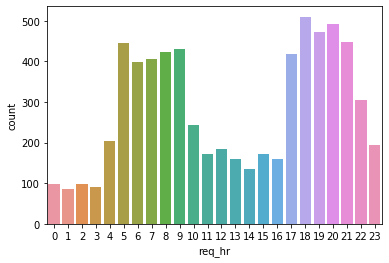

In [17]:
sns.countplot(x='req_hr',data=uber)
plt.show()

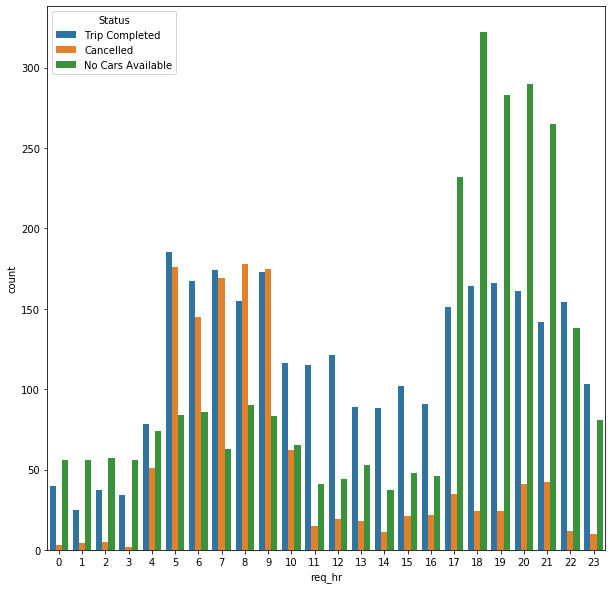

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='req_hr',data=uber,hue='Status')
plt.show()

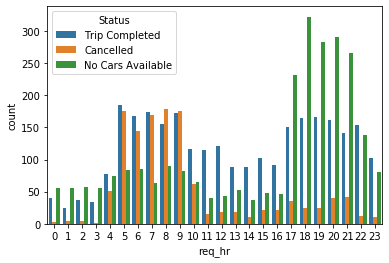

In [19]:
sns.countplot(x='req_hr',data=uber,hue='Status')
plt.show()

C:\Users\JERRY\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


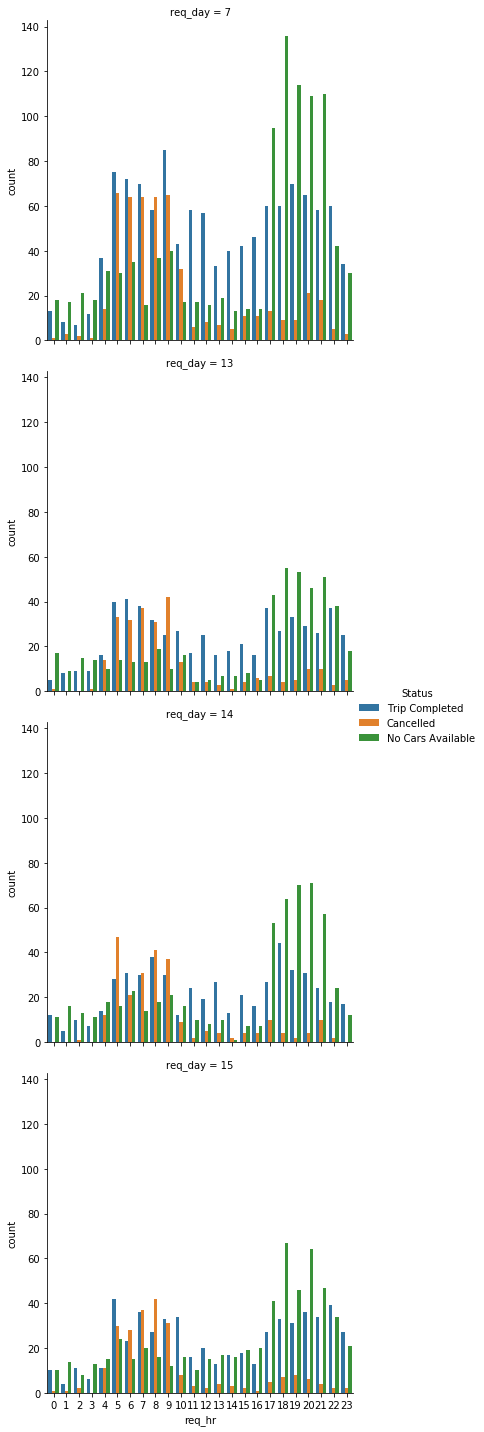

In [20]:
sns.factorplot(x="req_hr",data=uber,row="req_day",hue="Status",kind="count")
plt.show()

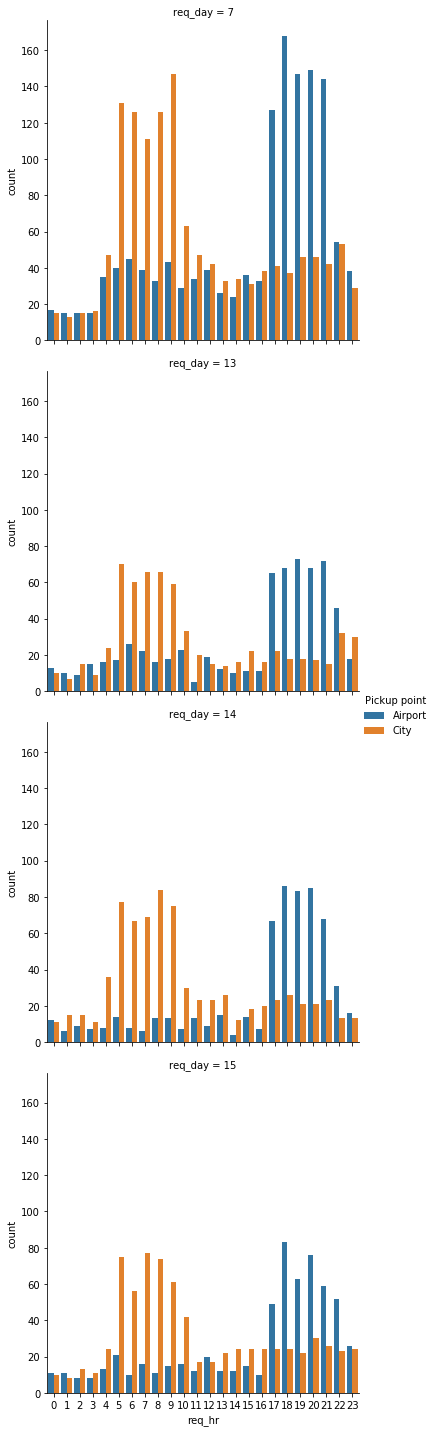

In [21]:
sns.factorplot(x='req_hr',data=uber,row='req_day',hue="Pickup point",kind='count')
plt.show()

In [22]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


#Write code for below condition
<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [23]:
uber["Time_Slot"]=""

In [24]:
j=0
for i in uber["req_hr"]:
    if uber.iloc[j,6]<5:
        uber.iloc[j,8]="Pre_morning"
    elif 5<= uber.iloc[j,6]<10:
        uber.iloc[j,8]="morning Rush"
    elif 10<=uber.iloc[j,6]<17:
        uber.iloc[j,8]="Day time"
    elif 17<= uber.iloc[j,6]<22:
        uber.iloc[j,8]="Evening Rush"
    else:
        uber.iloc[j,8]="Late night"
    j+=1

In [25]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,morning Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,morning Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late night


In [26]:
uber["Time_Slot"].value_counts()

Evening Rush    2342
morning Rush    2103
Day time        1224
Pre_morning      578
Late night       498
Name: Time_Slot, dtype: int64

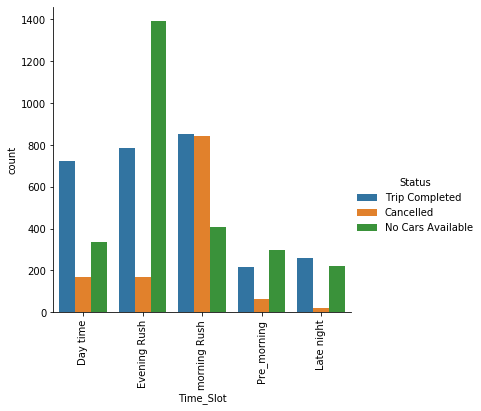

In [30]:
sns.catplot(x="Time_Slot",data=uber,hue='Status',kind='count')
plt.xticks(rotation=90)
plt.show()

In [42]:
uber_morning_rush=uber[uber['Time_Slot']=='morning Rush']
uber_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,morning Rush
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,morning Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,morning Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,morning Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,morning Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,morning Rush


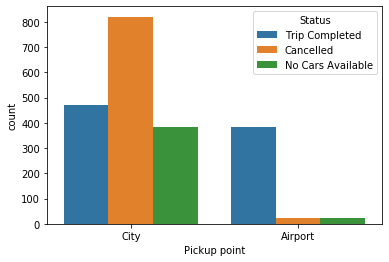

In [43]:
sns.countplot('Pickup point',hue='Status',data=uber_morning_rush)
plt.show()

In [45]:
uber_Airport_Cancelled=uber_morning_rush[(uber_morning_rush['Pickup point']=='Airport') & (uber_morning_rush['Status']=='Cancelled')]

In [46]:
uber_Airport_Cancelled.shape

(23, 9)

In [48]:
uber_Airport_Cancelled.shape[0]

23

In [49]:
uber_City_Cancelled=uber_morning_rush[(uber_morning_rush['Pickup point']=='City') & (uber_morning_rush['Status']=='Cancelled')]

In [51]:
uber_City_Cancelled.shape[0]

820

# Supply and Demand

In [53]:
(uber_morning_rush['Pickup point']).value_counts()

City       1677
Airport     426
Name: Pickup point, dtype: int64

In [61]:
uber_morning_rush[(uber_morning_rush['Status']=='Trip Completed')&(uber_morning_rush['Pickup point']=='City')].shape[0]

472

In [62]:
uber_morning_rush[(uber_morning_rush['Status']=='Trip Completed')&(uber_morning_rush['Pickup point']=='Airport')].shape[0]

382

In [65]:
uber_evening_rush=uber[uber['Time_Slot']=='Evening Rush']

In [66]:
uber_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening Rush


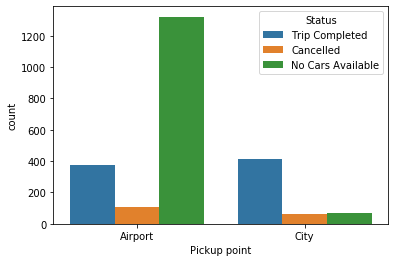

In [68]:
sns.countplot(x='Pickup point',data=uber_evening_rush,hue='Status')
plt.show()

In [70]:
uber_evening_rush["Pickup point"].value_counts()

Airport    1800
City        542
Name: Pickup point, dtype: int64

In [75]:
uber_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [73]:
uber_evening_rush[(uber_evening_rush["Pickup point"]=='Airport')&(uber_evening_rush['Status']=='No Cars Available')].shape[0]

1321

In [72]:
uber_evening_rush[(uber_evening_rush["Pickup point"]=='City')&(uber_evening_rush['Status']=='No Cars Available')].shape[0]

71

# Pie Chart

In [78]:
uber_morning_city=uber[(uber['Time_Slot']=='morning Rush')&(uber["Pickup point"]=="City")]

In [81]:
uber_morning_city_count= pd.DataFrame(uber_morning_city['Status'].value_counts())

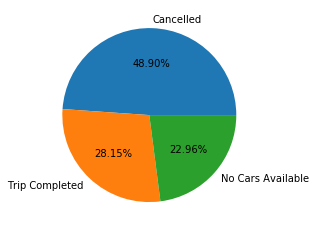

In [100]:
fig,ax=plt.subplots()
ax.pie('Status',data=uber_morning_city_count,labels=uber_morning_city_count['Status'].index,autopct='%.2f%%')
plt.show()

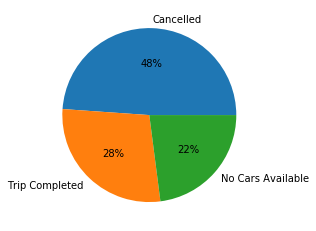

In [101]:
fig,ax=plt.subplots()
ax.pie('Status',data=uber_morning_city_count,labels=uber_morning_city_count['Status'].index,autopct='%i%%')
plt.show()

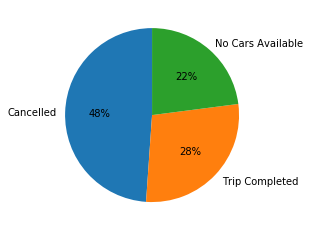

In [102]:
fig,ax=plt.subplots()
ax.pie('Status',data=uber_morning_city_count,labels=uber_morning_city_count['Status'].index,autopct='%i%%',startangle=90)
plt.show()